In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
file_path = "../data/icon_summary_annotated.csv"

df = pd.read_csv(
    file_path,
    delimiter=",",
    encoding="utf-8",
    header=0
)

In [4]:
df.head()

,nodes,taskspernode,threadspertask,iconsteps,cpufreq,slurm_job_id,cnt,tpe,tlb,tce,tse,tte,tmpe,tmlb,tmce,tmse,tmte,tope,tolb,toce,tose,tote,epe,elb,ece,ese,ete,empe,emlb,emce,emse,emte,eope,eolb,eoce,eose,eote,total_time
0,1,4,24,1,1000000,60244226,1,0.805,0.938,0.858,0.937,0.916,0.916,0.952,0.962,0.993,0.969,0.879,0.985,0.892,0.944,0.945,0.812,0.926,0.876,0.997,0.879,0.972,0.964,1.008,1.001,1.008,0.835,0.961,0.869,0.996,0.873,85.690
1,1,4,24,1,1500000,60244227,1,0.799,0.945,0.845,0.929,0.910,0.917,0.960,0.955,0.991,0.964,0.871,0.984,0.885,0.938,0.944,0.811,0.965,0.841,0.948,0.886,0.962,0.987,0.975,0.998,0.976,0.844,0.979,0.862,0.950,0.908,75.614
2,1,4,24,1,2000000,60244228,1,0.809,0.940,0.861,0.940,0.916,0.927,0.965,0.961,0.993,0.967,0.872,0.974,0.896,0.946,0.947,0.823,0.932,0.883,0.986,0.895,0.960,0.976,0.983,0.996,0.987,0.857,0.955,0.897,0.990,0.907,67.480
3,1,4,24,1,2500000,60244229,1,0.815,0.950,0.858,0.941,0.912,0.921,0.960,0.959,0.995,0.964,0.885,0.989,0.895,0.946,0.946,0.829,0.969,0.856,0.959,0.893,0.921,0.977,0.942,0.999,0.943,0.901,0.992,0.908,0.960,0.947,37.187
4,1,4,24,1,3000000,60244230,1,0.593,0.667,0.889,0.945,0.941,0.735,0.755,0.974,0.996,0.978,0.807,0.883,0.913,0.949,0.962,0.674,0.768,0.878,0.955,0.919,0.936,0.850,1.102,1.002,1.100,0.720,0.904,0.797,0.953,0.836,37.435


In [5]:
df.shape

(224, 38)

In [6]:
df.columns[(df > 1).any(axis=0)]
# PE, CommE, SerE, TE
# MPI SerE
# OMP PE, OMP CommE, OMP SerE, OMP TE

Index(['taskspernode', 'threadspertask', 'iconsteps', 'cpufreq',
       'slurm_job_id', 'epe', 'elb', 'ece', 'ese', 'ete', 'emce', 'emse',
       'emte', 'eope', 'eolb', 'eoce', 'eose', 'eote', 'total_time'],
      dtype='object')

In [7]:
df_without_overflow = df[df["total_time"] < 19*60 + 50]  # 19min 50sec
df_without_overflow.head()

,nodes,taskspernode,threadspertask,iconsteps,cpufreq,slurm_job_id,cnt,tpe,tlb,tce,tse,tte,tmpe,tmlb,tmce,tmse,tmte,tope,tolb,toce,tose,tote,epe,elb,ece,ese,ete,empe,emlb,emce,emse,emte,eope,eolb,eoce,eose,eote,total_time
0,1,4,24,1,1000000,60244226,1,0.805,0.938,0.858,0.937,0.916,0.916,0.952,0.962,0.993,0.969,0.879,0.985,0.892,0.944,0.945,0.812,0.926,0.876,0.997,0.879,0.972,0.964,1.008,1.001,1.008,0.835,0.961,0.869,0.996,0.873,85.690
1,1,4,24,1,1500000,60244227,1,0.799,0.945,0.845,0.929,0.910,0.917,0.960,0.955,0.991,0.964,0.871,0.984,0.885,0.938,0.944,0.811,0.965,0.841,0.948,0.886,0.962,0.987,0.975,0.998,0.976,0.844,0.979,0.862,0.950,0.908,75.614
2,1,4,24,1,2000000,60244228,1,0.809,0.940,0.861,0.940,0.916,0.927,0.965,0.961,0.993,0.967,0.872,0.974,0.896,0.946,0.947,0.823,0.932,0.883,0.986,0.895,0.960,0.976,0.983,0.996,0.987,0.857,0.955,0.897,0.990,0.907,67.480
3,1,4,24,1,2500000,60244229,1,0.815,0.950,0.858,0.941,0.912,0.921,0.960,0.959,0.995,0.964,0.885,0.989,0.895,0.946,0.946,0.829,0.969,0.856,0.959,0.893,0.921,0.977,0.942,0.999,0.943,0.901,0.992,0.908,0.960,0.947,37.187
4,1,4,24,1,3000000,60244230,1,0.593,0.667,0.889,0.945,0.941,0.735,0.755,0.974,0.996,0.978,0.807,0.883,0.913,0.949,0.962,0.674,0.768,0.878,0.955,0.919,0.936,0.850,1.102,1.002,1.100,0.720,0.904,0.797,0.953,0.836,37.435


In [8]:
df_without_overflow.shape

(195, 38)

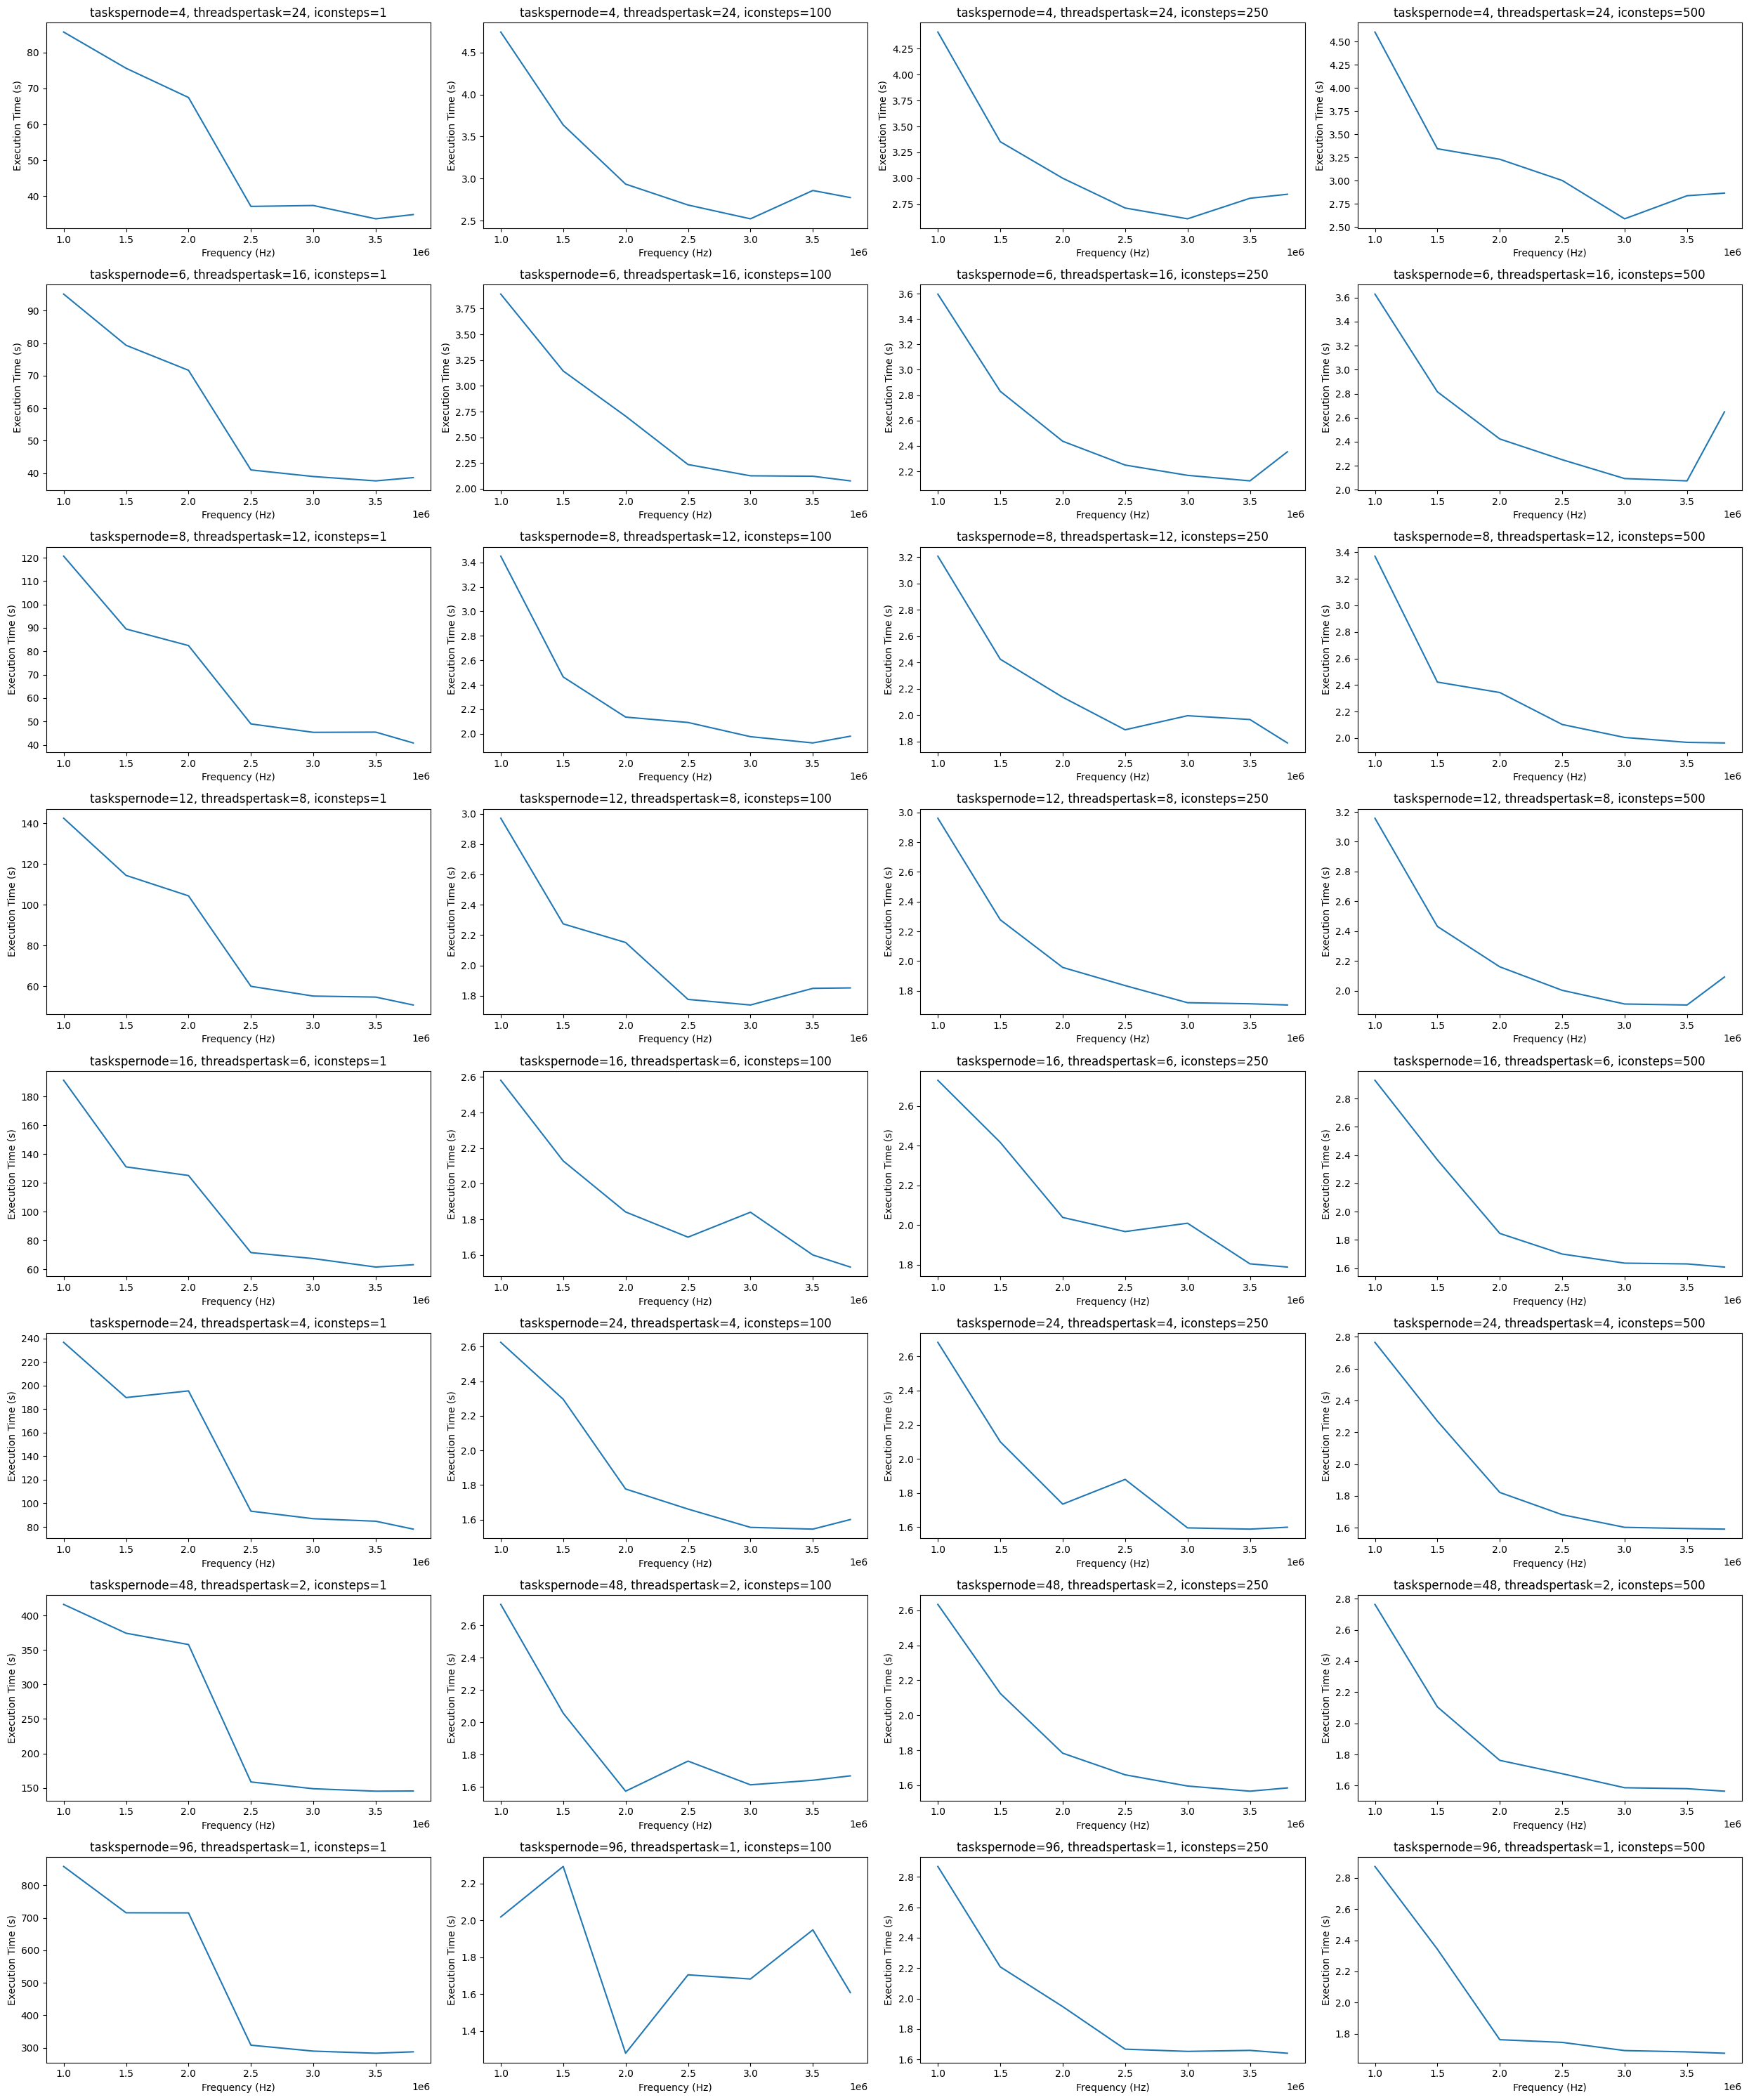

In [9]:
fig, axs = plt.subplots(8, 4, figsize=(25, 30))
first_step_runtime = None

for i, task in enumerate(df["taskspernode"].unique()):
    for j, step in enumerate(df["iconsteps"].unique()):
        subset_df = df[(df["taskspernode"] == task) & (df["iconsteps"] == step)]
        if step == 1:
            first_step_runtime = subset_df['total_time']
            axs[i, j].plot(subset_df['cpufreq'], subset_df['total_time'])
            axs[i, j].set_title(f'taskspernode={task}, threadspertask={96//task}, iconsteps={step}')
            axs[i, j].set_xlabel('Frequency (Hz)')
            axs[i, j].set_ylabel('Execution Time (s)')
        else:
            if len(subset_df['total_time']) != len(first_step_runtime.values):
                continue
            axs[i, j].plot(subset_df['cpufreq'], (subset_df['total_time'] - first_step_runtime.values) / (step - 1))
            axs[i, j].set_title(f'taskspernode={task}, threadspertask={96//task}, iconsteps={step}')
            axs[i, j].set_xlabel('Frequency (Hz)')
            axs[i, j].set_ylabel('Execution Time (s)')

plt.tight_layout()

plt.savefig("../results/icon_cpufreq_total_time.png", dpi=300)
plt.show()

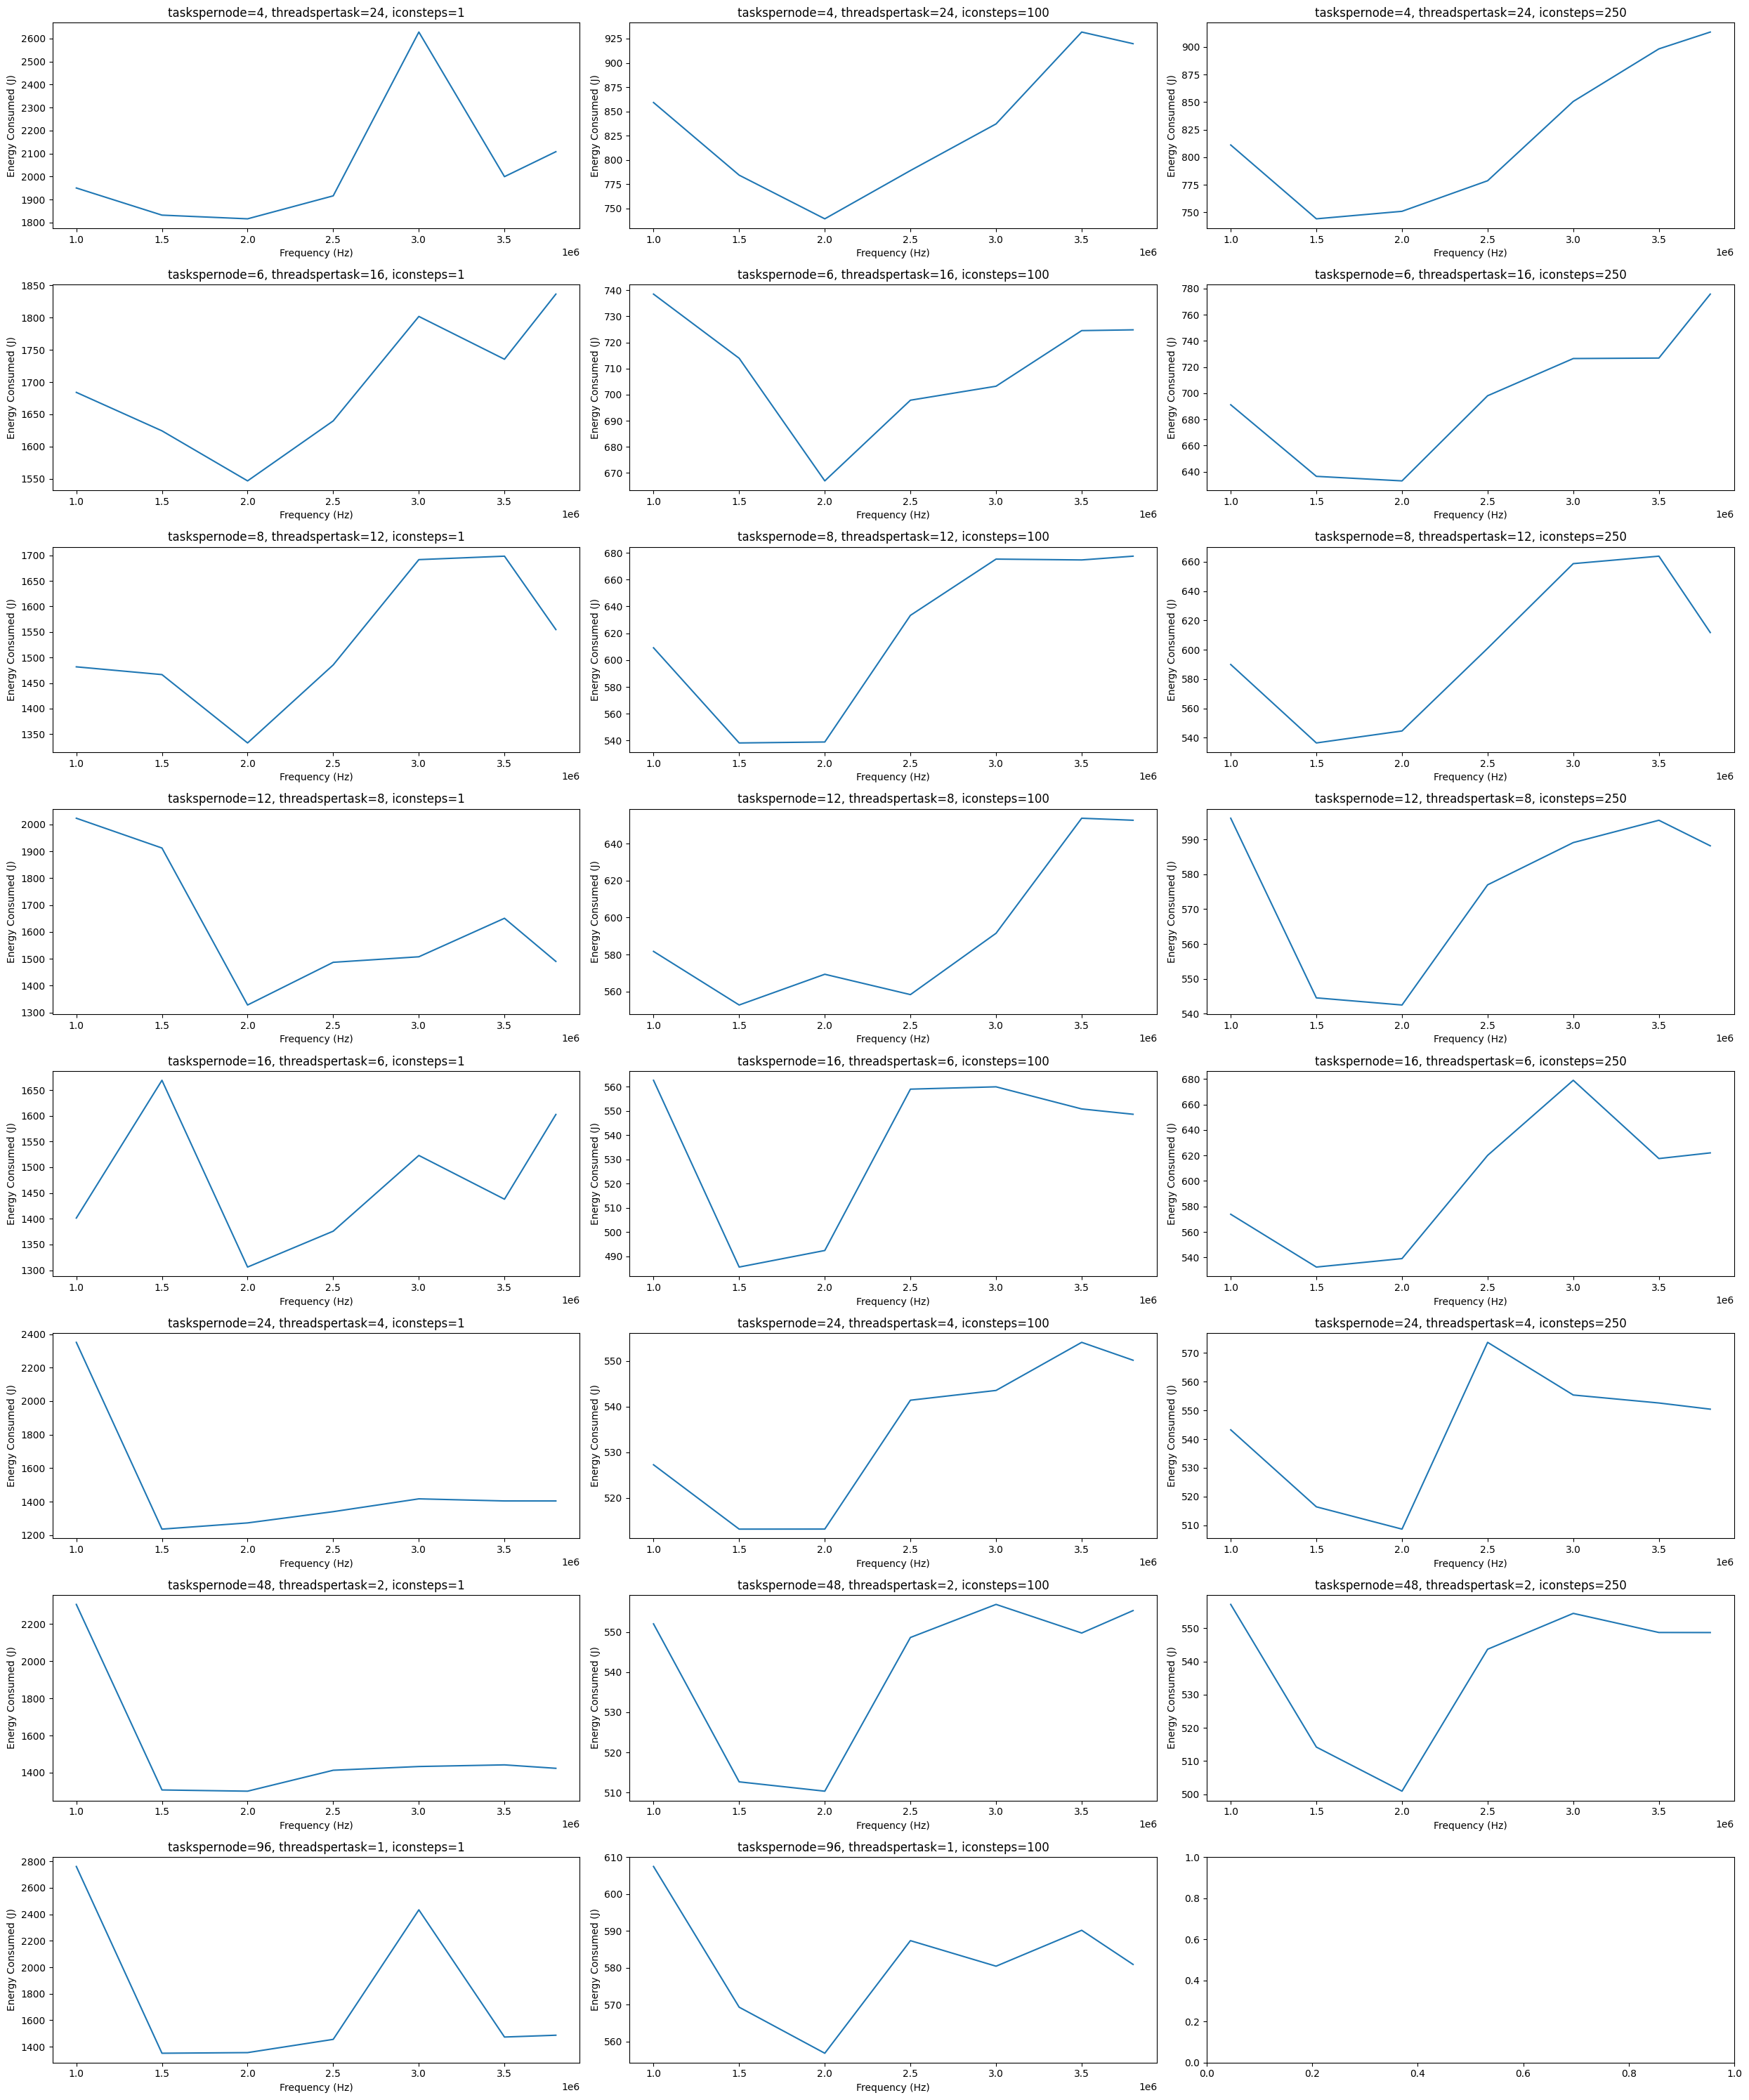

In [10]:
fig, axs = plt.subplots(8, 3, figsize=(25, 30))
first_step_energy = None

for i, task in enumerate(df_without_overflow["taskspernode"].unique()):
    for j, step in enumerate([1, 100, 250]):
        subset_df = df_without_overflow[(df_without_overflow["taskspernode"] == task) & (df_without_overflow["iconsteps"] == step)]

        total_energy_list = []
        for freq in subset_df["cpufreq"].unique():
            single_run_df = pd.read_csv(
                f"../data/icon_reports/{task}_ranks_{96 // task}_threads_{freq}_hz_{step}_steps.csv",
                delimiter=",",
                encoding="utf-8",
                header=0
            )

            total_energy_list.append(single_run_df["total_energy"].max())

        if step == 1:
            first_step_energy = total_energy_list
            axs[i, j].plot(subset_df['cpufreq'], total_energy_list)
            axs[i, j].set_title(f'taskspernode={task}, threadspertask={96//task}, iconsteps={step}')
            axs[i, j].set_xlabel('Frequency (Hz)')
            axs[i, j].set_ylabel('Energy Consumed (J)')
        else:
            if len(total_energy_list) != len(first_step_energy):
                continue
            total_energy_list = np.array(total_energy_list)
            first_step_energy = np.array(first_step_energy)
            axs[i, j].plot(subset_df['cpufreq'], (total_energy_list - first_step_energy) / (step - 1))
            axs[i, j].set_title(f'taskspernode={task}, threadspertask={96//task}, iconsteps={step}')
            axs[i, j].set_xlabel('Frequency (Hz)')
            axs[i, j].set_ylabel('Energy Consumed (J)')

plt.tight_layout()

plt.savefig("../results/icon_cpufreq_total_energy.png", dpi=300)
plt.show()

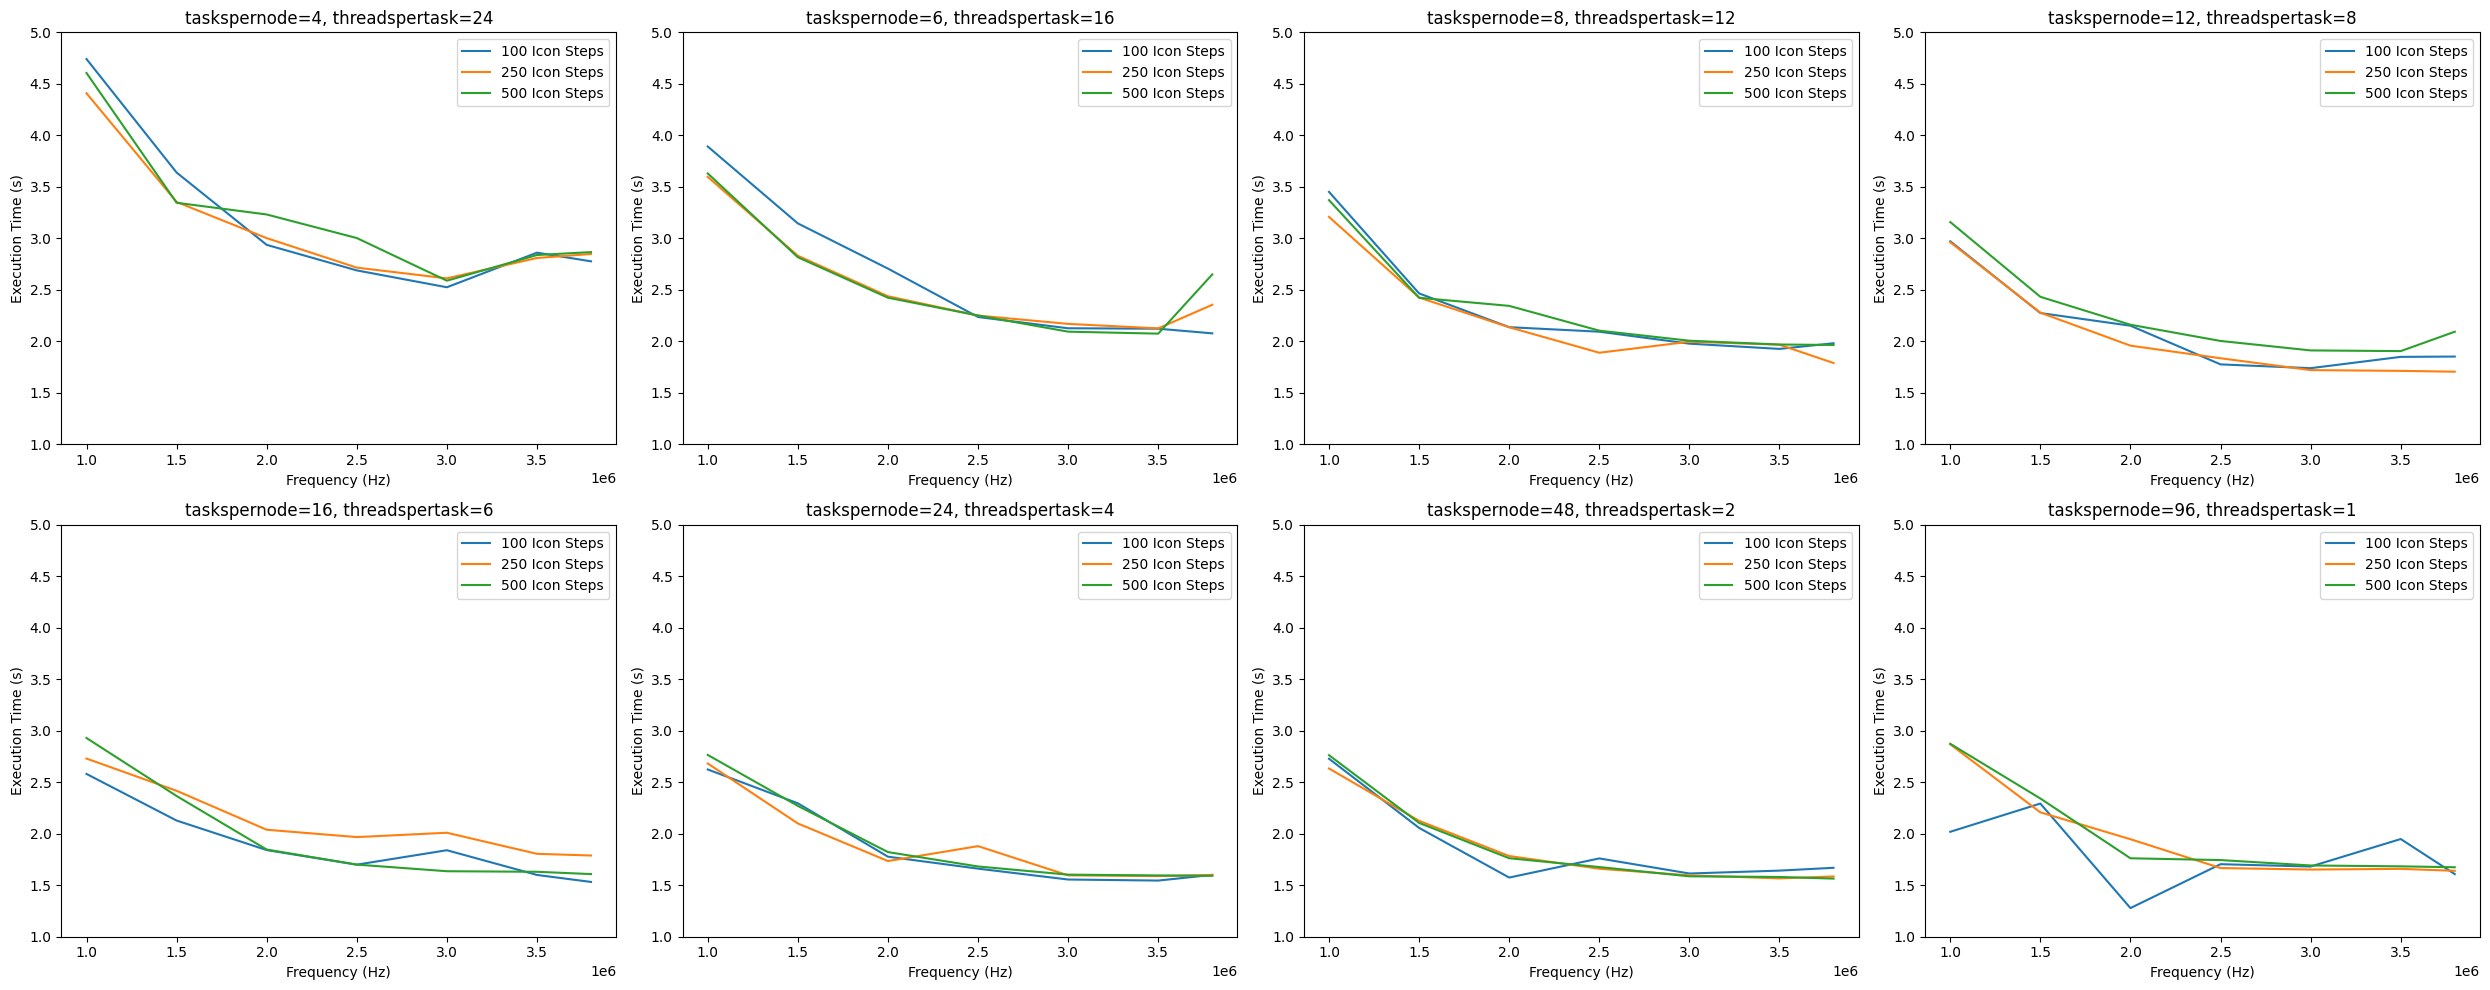

In [11]:
fig, axs = plt.subplots(2, 4, figsize=(25, 10))
first_step_runtime = None

for i, task in enumerate(df["taskspernode"].unique()):
    for j, step in enumerate(df["iconsteps"].unique()):
        subset_df = df[(df["taskspernode"] == task) & (df["iconsteps"] == step)]
        if step == 1:
            first_step_runtime = subset_df['total_time']
        else:
            if len(subset_df['total_time']) != len(first_step_runtime.values):
                continue
            axs[i//4, i%4].plot(subset_df['cpufreq'], (subset_df['total_time'] - first_step_runtime.values) / (step - 1), label=f"{step} Icon Steps")
            axs[i//4, i%4].set_title(f'taskspernode={task}, threadspertask={96//task}')
            axs[i//4, i%4].set_xlabel('Frequency (Hz)')
            axs[i//4, i%4].set_ylabel('Execution Time (s)')
            axs[i//4, i%4].legend()
            axs[i//4, i%4].set_ylim([1, 5])

plt.tight_layout()

plt.savefig("../results/icon_cpufreq_total_time_compact.png", dpi=300)
plt.show()

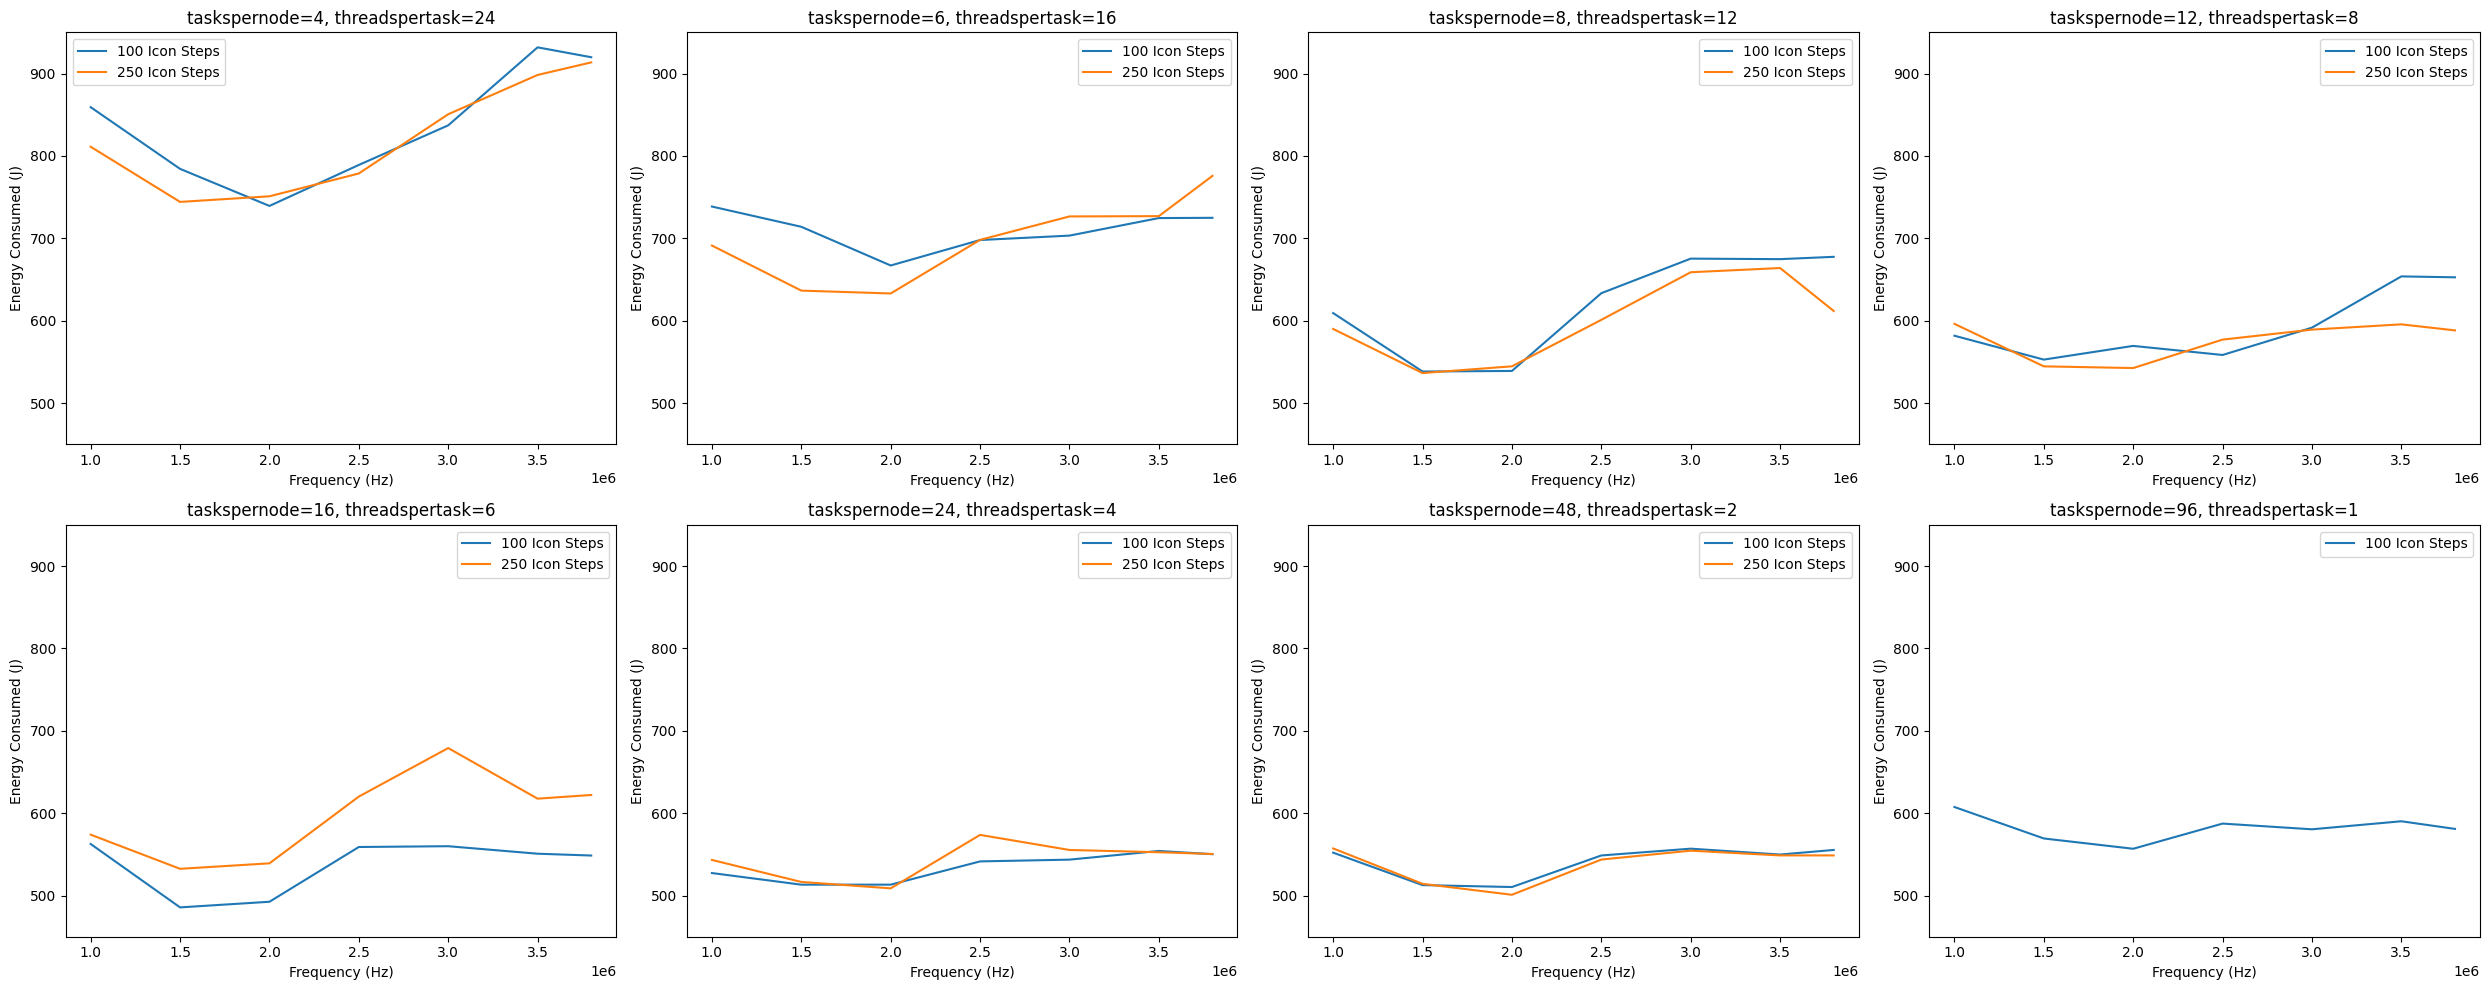

In [12]:
fig, axs = plt.subplots(2, 4, figsize=(25, 10))
first_step_energy = None

for i, task in enumerate(df_without_overflow["taskspernode"].unique()):
    for j, step in enumerate([1, 100, 250]):
        subset_df = df_without_overflow[(df_without_overflow["taskspernode"] == task) & (df_without_overflow["iconsteps"] == step)]

        total_energy_list = []
        for freq in subset_df["cpufreq"].unique():
            single_run_df = pd.read_csv(
                f"../data/icon_reports/{task}_ranks_{96 // task}_threads_{freq}_hz_{step}_steps.csv",
                delimiter=",",
                encoding="utf-8",
                header=0
            )

            total_energy_list.append(single_run_df["total_energy"].max())

        if step == 1:
            first_step_energy = total_energy_list
        else:
            if len(total_energy_list) != len(first_step_energy):
                continue
            total_energy_list = np.array(total_energy_list)
            first_step_energy = np.array(first_step_energy)
            axs[i//4, i%4].plot(subset_df['cpufreq'], (total_energy_list - first_step_energy) / (step - 1), label=f"{step} Icon Steps")
            axs[i//4, i%4].set_title(f'taskspernode={task}, threadspertask={96//task}')
            axs[i//4, i%4].set_xlabel('Frequency (Hz)')
            axs[i//4, i%4].set_ylabel('Energy Consumed (J)')
            axs[i//4, i%4].legend()
            axs[i//4, i%4].set_ylim([450, 950])

plt.tight_layout()

plt.savefig("../results/icon_cpufreq_total_energy_compact.png", dpi=300)
plt.show()